In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import filters

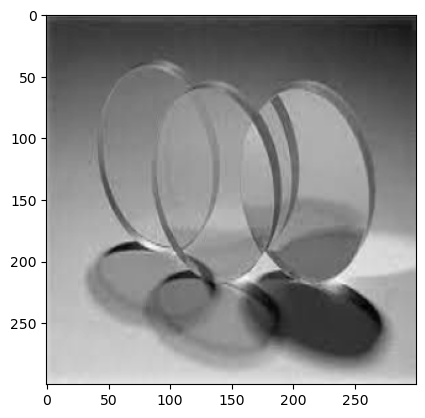

In [3]:
img = cv2.imread('img.png', 0)
img = cv2.resize(img, (300, 300))
plt.imshow(img, cmap='gray')

**Intensity transform**

In [3]:
min_intensity = np.min(img)
max_intensity = np.max(img)
transformed_img = ((img - min_intensity) / (max_intensity - min_intensity)) * 255
print(min_intensity)
print(max_intensity)

4
247


In [4]:
transformed_img = transformed_img.astype(np.uint8)

In [5]:
alpha = 1.3 # Scaling factor
beta = 50   # Scalar added to each pixel
adjusted_img = cv2.convertScaleAbs(transformed_img, alpha=alpha, beta=beta)

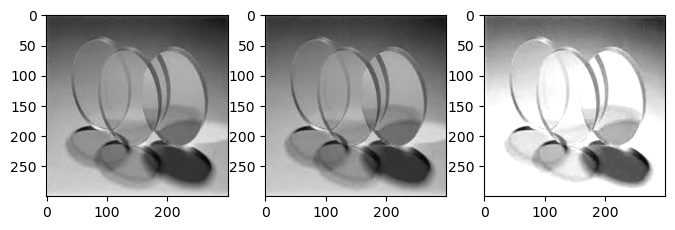

In [6]:
plt.figure(figsize=(8, 8))
plt.subplot(3, 3, 1)
plt.imshow(img, cmap='gray')
plt.subplot(3, 3, 2)
plt.imshow(transformed_img, cmap='gray')
plt.subplot(3, 3, 3)
plt.imshow(adjusted_img, cmap='gray')

**HighPass filter**

In [57]:
kernel = np.array([[-1, -1, -1],
                       [-1,  8, -1],
                       [-1, -1, -1]])
kernel = kernel / 9

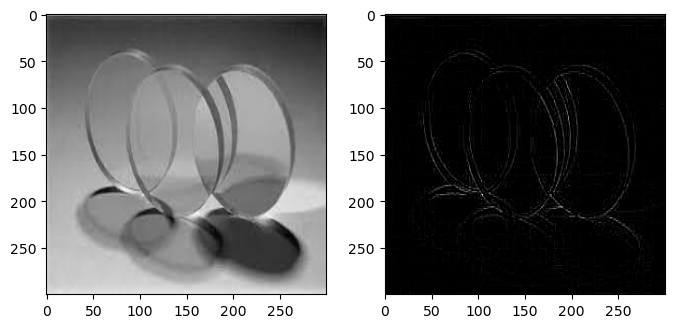

In [58]:
high_pass_img = cv2.filter2D(img, -1, kernel)
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(high_pass_img, cmap='gray')

**Lowpass filter**

In [17]:
sigma = 1.5  # Adjust sigma for the desired level of blurring
low_pass_filtered_image = filters.gaussian(img, sigma)

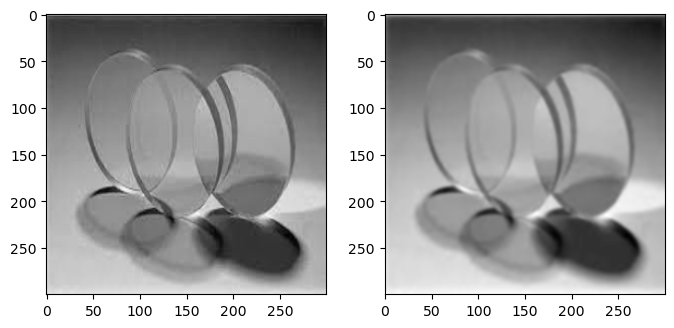

In [18]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(low_pass_filtered_image, cmap='gray')

**Laplacian Filter**

In [4]:
laplacian_image = cv2.Laplacian(img, cv2.CV_64F)
laplacian_image = np.uint8(np.absolute(laplacian_image))

(-0.5, 299.5, 299.5, -0.5)

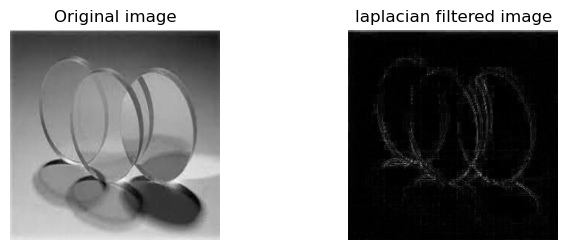

In [5]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original image")
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(laplacian_image, cmap='gray')
plt.title("laplacian filtered image")
plt.axis("off")

**Edge Detection**

(-0.5, 299.5, 299.5, -0.5)

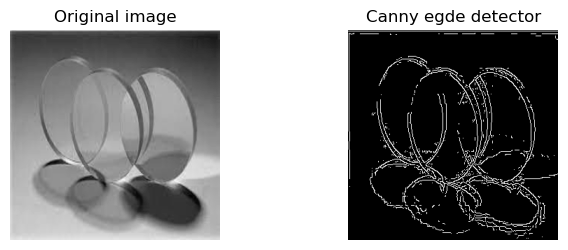

In [34]:
canny_edge = cv2.Canny(img, 55, 55)
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original image")
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(canny_edge, cmap='gray')
plt.title("Canny egde detector")
plt.axis("off")

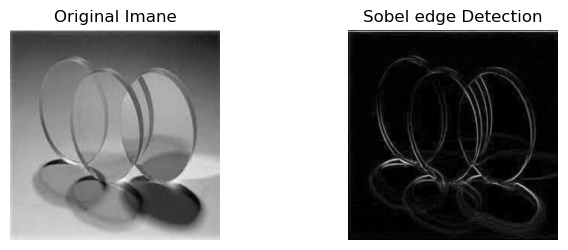

In [36]:
ddepth = cv2.CV_64F
dx = cv2.Sobel(img, ddepth, 1, 0, ksize=3)
dy = cv2.Sobel(img, ddepth, 0, 1, ksize=3)
magnitude = np.sqrt(dx**2 + dy**2)
sobel_edge = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Imane")
plt.axis("off")
plt.subplot(2, 2, 2)
plt.title("Sobel edge Detection")
plt.axis("off")
plt.imshow(sobel_edge, cmap='gray')

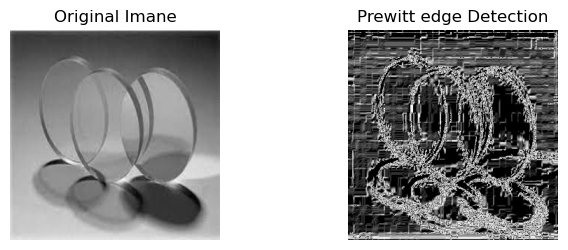

In [59]:
prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

prewitt_y = np.array([[-1, -1, -1],
                      [ 0,  0,  0],
                      [ 1,  1,  1]])
dx = cv2.filter2D(img, -1, prewitt_x)
dy = cv2.filter2D(img, -1, prewitt_y)
prewitt_edge = np.sqrt(dx**2 + dy**2)
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Imane")
plt.axis("off")
plt.subplot(2, 2, 2)
plt.title("Prewitt edge Detection")
plt.axis("off")
plt.imshow(prewitt_edge, cmap='gray')

**intensity transform**

In [6]:
alpha = 1.5  # Contrast control (1.0 for no change)
beta = 50   # Brightness control (0 for no change)

In [8]:
intensity_transformed_image = np.clip(alpha * img + beta, 0, 255).astype(np.uint8)

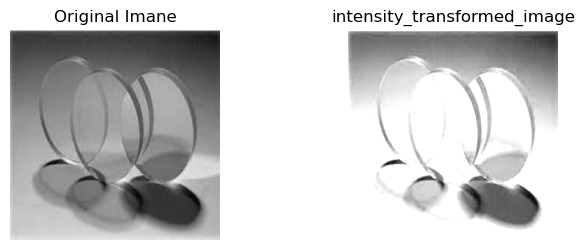

In [9]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Imane")
plt.axis("off")
plt.subplot(2, 2, 2)
plt.title("intensity_transformed_image")
plt.axis("off")
plt.imshow(intensity_transformed_image, cmap='gray')

**Negation**

In [10]:
negated_image = 255 - img

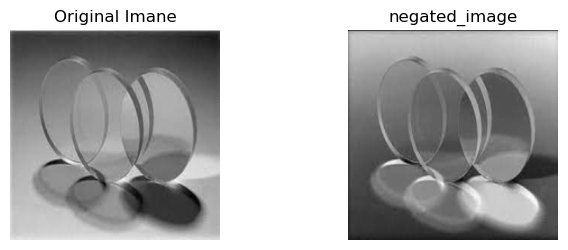

In [11]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Imane")
plt.axis("off")
plt.subplot(2, 2, 2)
plt.title("negated_image")
plt.axis("off")
plt.imshow(negated_image, cmap='gray')

**Log transform**

In [13]:
c = 1
log_transformed_image = c * np.log1p(img)
log_transformed_image = (log_transformed_image / np.max(log_transformed_image)) * 255
log_transformed_image = log_transformed_image.astype(np.uint8)

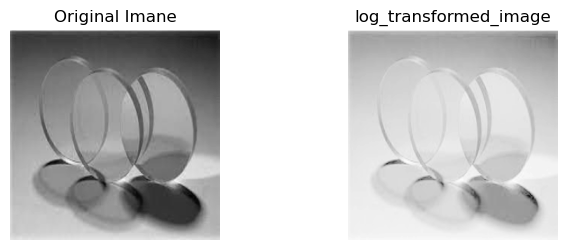

In [14]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Imane")
plt.axis("off")
plt.subplot(2, 2, 2)
plt.title("log_transformed_image")
plt.axis("off")
plt.imshow(log_transformed_image, cmap='gray')

**Power law transform**

In [16]:
c=1
gamma=1
power_law_transformed_image = c * np.power(img, gamma)
power_law_transformed_image = (power_law_transformed_image / np.max(power_law_transformed_image)) * 255
power_law_transformed_image = power_law_transformed_image.astype(np.uint8)

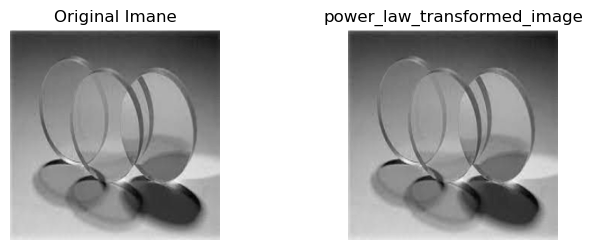

In [17]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Imane")
plt.axis("off")
plt.subplot(2, 2, 2)
plt.title("power_law_transformed_image")
plt.axis("off")
plt.imshow(power_law_transformed_image, cmap='gray')

**piecewise linear transform**

In [20]:
points = [(0, 0), (50, 30), (150, 200), (255, 255)]
lookup_table = np.zeros(256, dtype=np.uint8)
for i in range(len(points) - 1):
    x1, y1 = points[i]
    x2, y2 = points[i + 1]
        
    for x in range(x1, x2 + 1):
        if x <= 255:
            y = int(y1 + (x - x1) * (y2 - y1) / (x2 - x1))
            lookup_table[x] = y
transformed_image = cv2.LUT(img, lookup_table)

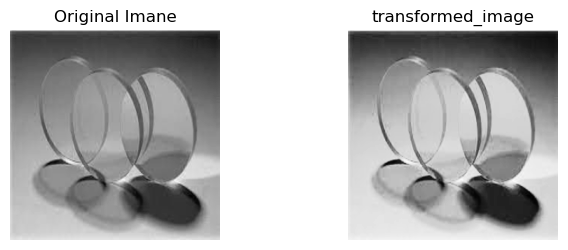

In [21]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Imane")
plt.axis("off")
plt.subplot(2, 2, 2)
plt.title("transformed_image")
plt.axis("off")
plt.imshow(transformed_image, cmap='gray')